# Explore TRI Inventory Data

This dataset covers all the TRI data for the US from 2018. I need to decide if I want to include data from other years or not.

In [17]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore')

In [8]:
# read data in
df_in = pd.read_excel('data/TRI-2018-US.xlsx')

In [10]:
# create copy of original data
df = df_in.copy()

In [19]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

df.sample(5)

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. FEDERAL FACILITY,15. INDUSTRY SECTOR CODE,16. INDUSTRY SECTOR,17. PRIMARY SIC,18. SIC 2,19. SIC 3,20. SIC 4,21. SIC 5,22. SIC 6,23. PRIMARY NAICS,24. NAICS 2,25. NAICS 3,26. NAICS 4,27. NAICS 5,28. NAICS 6,29. DOC_CTRL_NUM,30. CHEMICAL,31. CAS #/COMPOUND ID,32. SRS ID,33. CLEAN AIR ACT CHEMICAL,34. CLASSIFICATION,35. METAL,36. METAL CATEGORY,37. CARCINOGEN,38. FORM TYPE,39. UNIT OF MEASURE,40. 5.1 - FUGITIVE AIR,41. 5.2 - STACK AIR,42. 5.3 - WATER,43. 5.4 - UNDERGROUND,44. 5.4.1 - UNDERGROUND CL I,45. 5.4.2 - UNDERGROUND C II-V,46. 5.5.1 - LANDFILLS,47. 5.5.1A - RCRA C LANDFILL,48. 5.5.1B - OTHER LANDFILLS,49. 5.5.2 - LAND TREATMENT,50. 5.5.3 - SURFACE IMPNDMNT,51. 5.5.3A - RCRA SURFACE IM,52. 5.5.3B - OTHER SURFACE I,53. 5.5.4 - OTHER DISPOSAL,54. ON-SITE RELEASE TOTAL,55. 6.1 - POTW - TRNS RLSE,56. 6.1 - POTW - TRNS TRT,57. POTW - TOTAL TRANSFERS,58. 6.2 - M10,59. 6.2 - M41,60. 6.2 - M62,61. 6.2 - M40 METAL,62. 6.2 - M61 METAL,63. 6.2 - M71,64. 6.2 - M81,65. 6.2 - M82,66. 6.2 - M72,67. 6.2 - M63,68. 6.2 - M66,69. 6.2 - M67,70. 6.2 - M64,71. 6.2 - M65,72. 6.2 - M73,73. 6.2 - M79,74. 6.2 - M90,75. 6.2 - M94,76. 6.2 - M99,77. OFF-SITE RELEASE TOTAL,78. 6.2 - M20,79. 6.2 - M24,80. 6.2 - M26,81. 6.2 - M28,82. 6.2 - M93,83. OFF-SITE RECYCLED TOTAL,84. 6.2 - M56,85. 6.2 - M92,86. OFF-SITE ENERGY RECOVERY T,87. 6.2 - M40 NON-METAL,88. 6.2 - M50,89. 6.2 - M54,90. 6.2 - M61 NON-METAL,91. 6.2 - M69,92. 6.2 - M95,93. OFF-SITE TREATED TOTAL,94. 6.2 - UNCLASSIFIED,95. 6.2 - TOTAL TRANSFER,96. TOTAL RELEASES,97. 8.1 - RELEASES,98. 8.1A - ON-SITE CONTAINED,99. 8.1B - ON-SITE OTHER,100. 8.1C - OFF-SITE CONTAIN,101. 8.1D - OFF-SITE OTHER R,102. 8.2 - ENERGY RECOVER ON,103. 8.3 - ENERGY RECOVER OF,104. 8.4 - RECYCLING ON SITE,105. 8.5 - RECYCLING OFF SIT,106. 8.6 - TREATMENT ON SITE,107. 8.7 - TREATMENT OFF SITE,108. PRODUCTION WSTE (8.1-8.7),109. 8.8 - ONE-TIME RELEASE,110. PROD_RATIO_OR_ ACTIVITY,111. 8.9 - PRODUCTION RATIO,112. PARENT CO NAME,113. PARENT CO DB NUM
51807,2018,2725WNDLRX932EA,110056968456,INDULOR AMERICA LP,932 E ELM ST,GRAHAM,ALAMANCE,NC,27253,NaN,NaN,36.08125,-79.38037,NO,325,Chemicals,NaN,NaN,NaN,NaN,NaN,NaN,325211,NaN,NaN,NaN,NaN,NaN,1318217081850,AMMONIA,7664417,152389.0,NO,TRI,NO,0,NO,R,Pounds,5.0,302.000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,307.000,5.0,0.0,5.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0,5.0,312.000,0,0.0,307.000,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,317.000,NaN,ACTIVITY,2.01,NaN,NaN
35301,2018,58102CSSCL200N2,110000428181,CASS CLAY CREAMERY INC,200 20TH ST N,FARGO,CASS,ND,58102,NaN,NaN,46.87883,-96.81218,NO,311,Food,NaN,NaN,NaN,NaN,NaN,NaN,311511,NaN,NaN,NaN,NaN,NaN,1318216899649,NITRATE COMPOUNDS,N511,649616.0,NO,TRI,NO,0,NO,R,Pounds,0.0,0.000,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.000,2832.5,25492.5,28325.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2832.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25492.5,0,25492.5,2832.500,0,0.0,0.000,0.0,2832.5,0.0,0.0,0.0,0.0,0.0,25492.5,28325.000,NaN,PRODUCTION,0.95,DAIRY FARMERS OF AMERICA INC,29855640
42389,2018,29687CHPTRTANNE,110000354955,CPJ TECHNOLOGIES,200 TANNER DR,TAYLORS,GREENVILLE,SC,29687,NaN,NaN,34.91539,-82.33253,NO,325,Chemicals,NaN,NaN,NaN,NaN,NaN,NaN,325613,325211.0,325520.0,NaN,NaN,NaN,1318217464787,XYLENE (MIXED ISOMERS),1330207,84970.0,YES,TRI,NO,0,NO,R,Pounds,4.0,0.700,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,4.700,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,4.700,0,0.0,4.700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.700,NaN,ACTIVITY,1.06,NaN,NaN
24462,2018,97470LTMNC186BE,110014266310,MDU RESOURCES ROSEBURG ASPHALT,186 BEAVER STATE RD,ROSEBURG,DOUGLAS,OR,97470,NaN,NaN,43.15

After viewing a sample of the data, I can already see there is a lot of information here. A total of 113 columns, including basic info like location data, as well as facility name, industry type, and parent corporation. There are a number of columns describing the chemical released, such as the chemical itself, whether it is a carcinogen or not, the unit of measure and then amounts released by various means, both onsite and offsite. 

The EPA provides [documentation](https://www.epa.gov/sites/production/files/2019-08/documents/basic_data_files_documentation_aug_2019_v2.pdf) for reading these TRI files. There are two columns, "ON-SITE RELEASE TOTAL" and "OFF-SITE RELEASE TOTAL" that sum the different types of releases either on-site or off-site. This makes me wonder where these off-site release locations are and if that data is available. 

I think I should keep the individual on-site release columns, but can likely get rid of the individual off-site release columns, only keeping the "OFF-SITE RELEASE TOTAL" for now, since this is a geographic exploration.

In [21]:
# list all the columns
list(df.columns)

['1. YEAR',
 '2. TRIFD',
 '3. FRS ID',
 '4. FACILITY NAME',
 '5. STREET ADDRESS',
 '6. CITY',
 '7. COUNTY',
 '8. ST',
 '9. ZIP',
 '10. BIA',
 '11. TRIBE',
 '12. LATITUDE',
 '13. LONGITUDE',
 '14. FEDERAL FACILITY',
 '15. INDUSTRY SECTOR CODE',
 '16. INDUSTRY SECTOR',
 '17. PRIMARY SIC',
 '18. SIC 2',
 '19. SIC 3',
 '20. SIC 4',
 '21. SIC 5',
 '22. SIC 6',
 '23. PRIMARY NAICS',
 '24. NAICS 2',
 '25. NAICS 3',
 '26. NAICS 4',
 '27. NAICS 5',
 '28. NAICS 6',
 '29. DOC_CTRL_NUM',
 '30. CHEMICAL',
 '31. CAS #/COMPOUND ID',
 '32. SRS ID',
 '33. CLEAN AIR ACT CHEMICAL',
 '34. CLASSIFICATION',
 '35. METAL',
 '36. METAL CATEGORY',
 '37. CARCINOGEN',
 '38. FORM TYPE',
 '39. UNIT OF MEASURE',
 '40. 5.1 - FUGITIVE AIR',
 '41. 5.2 - STACK AIR',
 '42. 5.3 - WATER',
 '43. 5.4 - UNDERGROUND',
 '44. 5.4.1 - UNDERGROUND CL I',
 '45. 5.4.2 - UNDERGROUND C II-V',
 '46. 5.5.1 - LANDFILLS',
 '47. 5.5.1A - RCRA C LANDFILL',
 '48. 5.5.1B - OTHER LANDFILLS',
 '49. 5.5.2 - LAND TREATMENT',
 '50. 5.5.3 - SURFACE

In [24]:
# go ahead and drop several columns
df_filter = df.drop(['18. SIC 2',
 '19. SIC 3',
 '20. SIC 4',
 '21. SIC 5',
 '22. SIC 6',
 '24. NAICS 2',
 '25. NAICS 3',
 '26. NAICS 4',
 '27. NAICS 5',
 '28. NAICS 6',
 '32. SRS ID',
 '38. FORM TYPE',
 '55. 6.1 - POTW - TRNS RLSE',
 '56. 6.1 - POTW - TRNS TRT',
 '57. POTW - TOTAL TRANSFERS',
 '58. 6.2 - M10',
 '59. 6.2 - M41',
 '60. 6.2 - M62',
 '61. 6.2 - M40 METAL',
 '62. 6.2 - M61 METAL',
 '63. 6.2 - M71',
 '64. 6.2 - M81',
 '65. 6.2 - M82',
 '66. 6.2 - M72',
 '67. 6.2 - M63',
 '68. 6.2 - M66',
 '69. 6.2 - M67',
 '70. 6.2 - M64',
 '71. 6.2 - M65',
 '72. 6.2 - M73',
 '73. 6.2 - M79',
 '74. 6.2 - M90',
 '75. 6.2 - M94',
 '76. 6.2 - M99',
 '78. 6.2 - M20',
 '79. 6.2 - M24',
 '80. 6.2 - M26',
 '81. 6.2 - M28',
 '82. 6.2 - M93',
 '84. 6.2 - M56',
 '85. 6.2 - M92',
 '87. 6.2 - M40 NON-METAL',
 '88. 6.2 - M50',
 '89. 6.2 - M54',
 '90. 6.2 - M61 NON-METAL',
 '91. 6.2 - M69',
 '92. 6.2 - M95'], axis=1)

In [25]:
df_filter.sample(5)

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,11. TRIBE,12. LATITUDE,13. LONGITUDE,14. FEDERAL FACILITY,15. INDUSTRY SECTOR CODE,16. INDUSTRY SECTOR,17. PRIMARY SIC,23. PRIMARY NAICS,29. DOC_CTRL_NUM,30. CHEMICAL,31. CAS #/COMPOUND ID,33. CLEAN AIR ACT CHEMICAL,34. CLASSIFICATION,35. METAL,36. METAL CATEGORY,37. CARCINOGEN,39. UNIT OF MEASURE,40. 5.1 - FUGITIVE AIR,41. 5.2 - STACK AIR,42. 5.3 - WATER,43. 5.4 - UNDERGROUND,44. 5.4.1 - UNDERGROUND CL I,45. 5.4.2 - UNDERGROUND C II-V,46. 5.5.1 - LANDFILLS,47. 5.5.1A - RCRA C LANDFILL,48. 5.5.1B - OTHER LANDFILLS,49. 5.5.2 - LAND TREATMENT,50. 5.5.3 - SURFACE IMPNDMNT,51. 5.5.3A - RCRA SURFACE IM,52. 5.5.3B - OTHER SURFACE I,53. 5.5.4 - OTHER DISPOSAL,54. ON-SITE RELEASE TOTAL,77. OFF-SITE RELEASE TOTAL,83. OFF-SITE RECYCLED TOTAL,86. OFF-SITE ENERGY RECOVERY T,93. OFF-SITE TREATED TOTAL,94. 6.2 - UNCLASSIFIED,95. 6.2 - TOTAL TRANSFER,96. TOTAL RELEASES,97. 8.1 - RELEASES,98. 8.1A - ON-SITE CONTAINED,99. 8.1B - ON-SITE OTHER,100. 8.1C - OFF-SITE CONTAIN,101. 8.1D - OFF-SITE OTHER R,102. 8.2 - ENERGY RECOVER ON,103. 8.3 - ENERGY RECOVER OF,104. 8.4 - RECYCLING ON SITE,105. 8.5 - RECYCLING OFF SIT,106. 8.6 - TREATMENT ON SITE,107. 8.7 - TREATMENT OFF SITE,108. PRODUCTION WSTE (8.1-8.7),109. 8.8 - ONE-TIME RELEASE,110. PROD_RATIO_OR_ ACTIVITY,111. 8.9 - PRODUCTION RATIO,112. PARENT CO NAME,113. PARENT CO DB NUM
18560,2018,49460JHCMP17000,110000411108,J H CAMPBELL GENERATING PLANT,17000 CROSWELL ST,WEST OLIVE,OTTAWA,MI,49460,NaN,NaN,42.912085,-86.203542,NO,2211,Electric Utilities,NaN,221112,1318217001282,HYDROGEN FLUORIDE,7664393,YES,TRI,NO,0,NO,Pounds,0.0,22175.0000,0.00,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,22175.0000,0.0,0.0,0.0,0.0,0,0.0,22175.0000,0,0.0,22175.0000,0.0,0.0,0.0,0.0,0.0,0.0,453089.00,0.0,475264.0000,NaN,PRODUCTION,0.98,CMS ENERGY,6959803
308,2018,32226STJHN11201,110000362134,ST JOHNS RIVER POWER PARK/NORTHSIDE GENERATING STATION,11201 NEW BERLIN RD,JACKSONVILLE,DUVAL,FL,32226,NaN,NaN,30.417526,-81.552279,NO,2211,Electric Utilities,NaN,221112,1318217482850,DIOXIN AND DIOXIN-LIKE COMPOUNDS,N150,YES,Dioxin,NO,0,YES,Grams,0.0,0.8145,0.00,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.8145,0.0,0.0,0.0,0.0,0,0.0,0.8145,0,0.0,0.8145,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.8145,NaN,ACTIVITY,0.54,JEA,77580223
901,2018,47265NRTHVHWY75,110064148881,NORTH VERNON INDUSTRY CORP,3750 4TH STREET,NORTH VERNON,JENNINGS,IN,47265,NaN,NaN,39.041062,-85.626018,NO,331,Primary Metals,NaN,331511,1318217155908,LEAD and LEAD COMPOUNDS,N420,YES,PBT,YES,1,NO,Pounds,80.0,1.5000,4.50,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,86.0000,0.9,0.6,0.0,0.0,0,1.5,86.9000,0,0.0,86.0000,0.9,0.0,0.0,0.0,0.0,0.6,0.00,0.0,87.5000,NaN,PRODUCTION,0.89,NaN,NaN
15851,2018,3704WMRCNS4483G,110043670514,AMERICAN SNUFF CO LLC,4483 GUTHRIE HWY,CLARKSVILLE,MONTGOMERY,TN,37040,NaN,NaN,36.622131,-87.230268,NO,3122,Tobacco,NaN,312230,1318216978650,NICOTINE AND SALTS,N503,NO,TRI,NO,0,NO,Pounds,0.0,586.0000,0.00,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,586.0000,0.0,0.0,0.0,0.0,0,0.0,586.0000,0,0.0,586.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,586.0000,NaN,PRODUCTION,0.52,REYNOLDS AMERICAN INC,157108643
11282,2018,70669CNCLKOLDSP,110000539757,PHILLIPS 66 LAKE CHARLES REFINERY,2200 OLD SPANISH TRAIL,WESTLAKE,CALCASIEU PARISH,LA,70669,NaN,NaN,30.242155,-93.274386,NO,324,Petroleum,NaN,324110,1318217109469,STYRENE,100425,YES,TRI,NO,0,YES,Pounds,84.1,109.0100,42.98,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,236.0900,0.0,0.0,0.0,0.0,0,0.0,236.0900,0,0.0,236.0900,0.0,0.0,0.0,0.0,0.0,0.0,1226.96,0.0,1463.0500,NaN,PRODUCTION,1.08,PHILLIPS 66 CO,78378508


In [122]:
# remove leading numbers, periods, and space and from column names
df.columns = df.columns.str.lstrip('0123456789.- ')

In [123]:
# looking at the chemical field to see all unique types
df['CHEMICAL'].unique()

array(['CHROMIUM', 'STYRENE', 'ETHYLENE GLYCOL', 'AMMONIA',
       '1,2,4-TRIMETHYLBENZENE', 'N-METHYL-2-PYRROLIDONE', 'LEAD',
       'MANGANESE COMPOUNDS', 'XYLENE (MIXED ISOMERS)', 'FORMALDEHYDE',
       'LEAD  and LEAD COMPOUNDS', 'POLYCYCLIC AROMATIC COMPOUNDS',
       'NITRATE COMPOUNDS',
       'CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED IN THE TRANSVAAL REGION)',
       'TOLUENE', 'PHENOL', 'SODIUM NITRITE', 'CHLORINE',
       'CERTAIN GLYCOL ETHERS', 'HYDROGEN SULFIDE', 'NICKEL', 'COPPER',
       'MANGANESE', 'SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ONLY)"',
       'ACETONITRILE', 'ARSENIC  and ARSENIC COMPOUNDS', 'NITRIC ACID',
       'DI(2-ETHYLHEXYL) PHTHALATE', 'BARIUM COMPOUNDS',
       'CRESOL (MIXED ISOMERS)', 'DIOXIN AND DIOXIN-LIKE COMPOUNDS',
       'ARSENIC COMPOUNDS', 'BENZO(G,H,I)PERYLENE', 'N-BUTYL ALCOHOL',
       'ACETALDEHYDE', 'COBALT COMPOUNDS',
       'HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOLS" ONLY)"',
       'DIISOCYANATES', 'BARIUM  and BARIU

In [124]:
# there are 505 unique chemicals reported in this dataset
df['CHEMICAL'].nunique()

505

In [125]:
# what are the most common chemicals reported?
df['CHEMICAL'].value_counts()

LEAD                                                                      4124
ZINC COMPOUNDS                                                            3047
NICKEL                                                                    2528
CHROMIUM                                                                  2464
COPPER                                                                    2444
AMMONIA                                                                   2328
MANGANESE                                                                 2281
NITRATE COMPOUNDS                                                         2268
METHANOL                                                                  2189
TOLUENE                                                                   2053
XYLENE (MIXED ISOMERS)                                                    2007
LEAD  and LEAD COMPOUNDS                                                  1959
LEAD COMPOUNDS                                      

In [126]:
# there is a classification attribute that each chemical falls under
df['CLASSIFICATION'].unique()

array(['TRI', 'PBT', 'Dioxin'], dtype=object)

In [127]:
# inspect the different units of measure
df['UNIT OF MEASURE'].unique()

array(['Pounds', 'Grams'], dtype=object)

In [128]:
# the data also tells whether or not the chemical is a carcinogen
df['CARCINOGEN'].unique()

array(['NO', 'YES'], dtype=object)

I'm going to split the data based on release measurement units to inspect the on- and off-site release totals.

In [130]:
dioxins = df[(df['CLASSIFICATION'] == 'Dioxin')]
all_others = df[(df['CLASSIFICATION'] == 'TRI') | (df['CLASSIFICATION'] == 'PBT')]

In [58]:
# there are 886 facilities that release dixoins
dioxins.shape[0]

886

In [59]:
# there are 78,601 facilities that release other chemicals measured in pounds
all_others.shape[0]

78601

In [131]:
# looking at stats for dioxin-releasing facilities
print('ON-SITE RELEASE TOTAL: GRAMS')
print(dioxins['ON-SITE RELEASE TOTAL'].describe())
print('OFF-SITE RELEASE TOTAL: GRAMS')
print(dioxins['OFF-SITE RELEASE TOTAL'].describe())

ON-SITE RELEASE TOTAL: GRAMS
count   886.00000  
mean    35.03818   
std     547.55663  
min     0.00000    
25%     0.15605    
50%     0.46490    
75%     1.30340    
max     14058.17650
Name: ON-SITE RELEASE TOTAL, dtype: float64
OFF-SITE RELEASE TOTAL: GRAMS
count   886.00000  
mean    73.28248   
std     1436.25954 
min     0.00000    
25%     0.00000    
50%     0.00000    
75%     0.00000    
max     35475.90363
Name: OFF-SITE RELEASE TOTAL, dtype: float64


In [132]:
# looking at stats for facilities measuring releases in pounds
print('ON-SITE RELEASE TOTAL: POUNDS')
print(all_others['ON-SITE RELEASE TOTAL'].describe())
print('OFF-SITE RELEASE TOTAL: POUNDS')
print(all_others['OFF-SITE RELEASE TOTAL'].describe())

# suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

ON-SITE RELEASE TOTAL: POUNDS
count   78601.00000    
mean    42865.22481    
std     2353745.35752  
min     0.00000        
25%     0.00000        
50%     18.72000       
75%     1096.00000     
max     490451405.51000
Name: ON-SITE RELEASE TOTAL, dtype: float64
OFF-SITE RELEASE TOTAL: POUNDS
count   78601.00000   
mean    6054.21618    
std     104718.51653  
min     0.00000       
25%     0.00000       
50%     0.00000       
75%     6.15000       
max     15100000.00000
Name: OFF-SITE RELEASE TOTAL, dtype: float64


This dataset contains a lot of information, but there are many other factors to consider as well. For instance, different chemicals have different toxicity levels, so comparing amounts of chemicals across the board is irrelevant and would be misleading. There is a document on the TRI website that will be useful when wrangling this dataset, [Factors to Consider when using Toxic Release Inventory Data](https://www.epa.gov/sites/production/files/2019-03/documents/factors_to_consider_march_2019.pdf). This document makes the note that method of release is a significant factor to consider when evaluating environmental hazard because some methods are more tightly controlled and have a smaller chance of migration 'beyond the fenceline' than others.

According to the document, some factors to Consider in using TRI data for exposure and risk analysis are:
- Toxicity of the Chemical
- Exposure Considerations
- Bioconcentration of the Chemical in the Food Chain
- Type of Disposal or Release (Environmental Medium)
- Type of Off-Site Facility Receiving the Chemical and the Efficiency of its Waste Management Practices
- On-Site Waste Management of the Toxic Chemical

In [133]:
# what industries are involved
df['INDUSTRY SECTOR'].value_counts()

Chemicals                            18306
Fabricated Metals                    8146 
Primary Metals                       5881 
Petroleum                            5651 
Nonmetallic Mineral Product          4711 
Transportation Equipment             4400 
Electric Utilities                   4397 
Petroleum Bulk Terminals             4021 
Food                                 3771 
Machinery                            2785 
Hazardous Waste                      2591 
Paper                                2452 
Plastics and Rubber                  2423 
Chemical Wholesalers                 2254 
Wood Products                        1423 
Other                                1346 
Computers and Electronic Products    1317 
Electrical Equipment                 1232 
Metal Mining                         662  
Miscellaneous Manufacturing          575  
Furniture                            383  
Printing                             212  
Textiles                             176  
Beverages  

In [71]:
# there are 79,487 records in the dataset
df.shape[0]

79487

In [134]:
# there are only 21,557 unique TRIDs in the dataset
df['TRIFD'].nunique()

21557

What does this mean? Each record in the dataset corresponds to a chemical that is released, so there are multiple entries for the same facility if the facility releases more than one chemical monitored by the TRI.

If I go with a storymap format for this project, I am thinking of going two directins with this TRI data. First, I can show all locations of each facility with all chemicals released from each one. Then in a later section I could narrow down the data, taking into account a specific chemical released and diving further into that.

In [144]:
# cast float columns as string type before grouping facilities by unique TRIFD
df_reduce[['ON-SITE RELEASE TOTAL', 'OFF-SITE RELEASE TOTAL', 'TOTAL RELEASES']] = df[['ON-SITE RELEASE TOTAL', 'OFF-SITE RELEASE TOTAL', 'TOTAL RELEASES']].astype(str)

In [145]:
# reduce data to one record per unique TRIFD, joining chemical information for each facility
df_reduce = df.fillna('').groupby('TRIFD').agg({'YEAR':'first',
                             'FACILITY NAME':'first',
                             'STREET ADDRESS':'first',
                             'CITY':'first',
                             'COUNTY':'first',
                             'ST':'first',
                             'ZIP':'first',
                             'BIA':'first',
                             'TRIBE':'first',
                             'LATITUDE':'first',
                             'LONGITUDE':'first',
                             'FEDERAL FACILITY':'first',
                             'INDUSTRY SECTOR':'first',
                             'CHEMICAL': ', '.join,
                             'CLASSIFICATION':', '.join,
                             'METAL':', '.join,
                             'CARCINOGEN':', '.join,
                             'UNIT OF MEASURE':', '.join,
                             'ON-SITE RELEASE TOTAL':', '.join,
                             'OFF-SITE RELEASE TOTAL':', '.join,
                             'TOTAL RELEASES':', '.join 
                                               }).reset_index()

In [149]:
# check results
df_reduce.sample(5)

,TRIFD,YEAR,FACILITY NAME,STREET ADDRESS,CITY,COUNTY,ST,ZIP,BIA,TRIBE,LATITUDE,LONGITUDE,FEDERAL FACILITY,INDUSTRY SECTOR,CHEMICAL,CLASSIFICATION,METAL,CARCINOGEN,UNIT OF MEASURE,ON-SITE RELEASE TOTAL,OFF-SITE RELEASE TOTAL,TOTAL RELEASES
14145,60618SWTCH5555N,2018,SWITCHCRAFT INC,5555 N ELSTON AVE,CHICAGO,COOK,IL,60630,,,41.98212,-87.76236,NO,Computers and Electronic Products,COPPER,TRI,YES,NO,Pounds,17.0,0.0,17.0
14572,62301PRRFR415N2,2018,PRAIRIE FARMS DAIRY INC,415 N 24TH ST,QUINCY,ADAMS,IL,62301,,,39.93583,-91.37815,NO,Food,"PERACETIC ACID, NITRIC ACID","TRI, TRI","NO, NO","NO, NO","Pounds, Pounds","0.0, 0.0","73.0, 4166.0","73.0, 4166.0"
10175,46514SPCLT55226,2018,BODYCOTE THERMAL PROCESSING,55226 CR 1N,ELKHART,ELKHART,IN,46514,,,41.69200,-86.04103,NO,Fabricated Metals,AMMONIA,TRI,NO,NO,Pounds,0.0,0.0,0.0
14949,64161FRDYC3700N,2018,CENTURY CONCRETE INC RANDOLPH FACILITY,3700 N SKILES RD,KANSAS CITY,CLAY,MO,64161,,,39.16075,-94.48514,NO,Nonmetallic Mineral Product,"MERCURY COMPOUNDS, LEAD COMPOUNDS","PBT, PBT","YES, YES","NO, NO","Pounds, Pounds","0.000909, 0.1616","0.0, 0.0","0.000909, 0.1616"
17750,7730WCSTPR14632,2018,LAMBERTI USA CONROE PLANT 8920,14622 EXXON RD,CONROE,MONTGOMERY,TX,77302,,,30.24099,-95.37884,NO,Chemicals,ETHYLENE GLYCOL,TRI,NO,NO,Pounds,14.0,49.9,63.9


In [150]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping

In [152]:
# convert reduced dataframe to geodataframe to visualize facilities
gdf = gpd.GeoDataFrame(
    df_reduce, geometry=gpd.points_from_xy(df_reduce.LONGITUDE, df_reduce.LATITUDE))

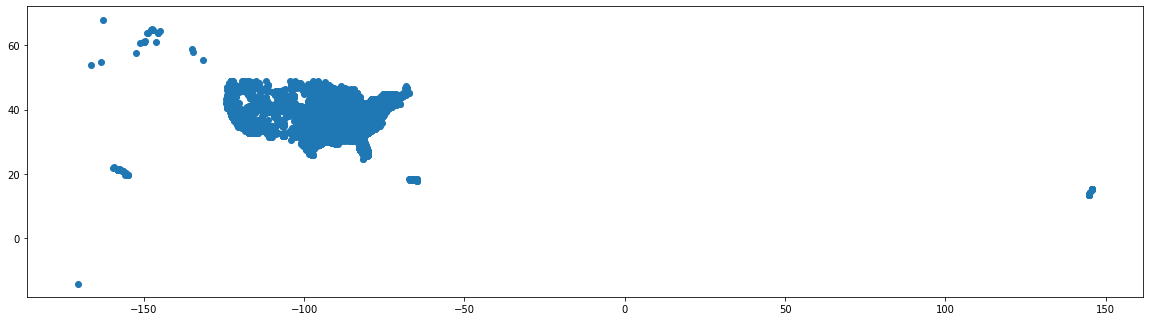

In [154]:
# quickly plot to see if conversion worked
%matplotlib inline
gdf.plot(figsize=(20,10));

In [158]:
# define crs for geodataframe
gdf.crs = {'init' :'epsg:4326'}

<function print>

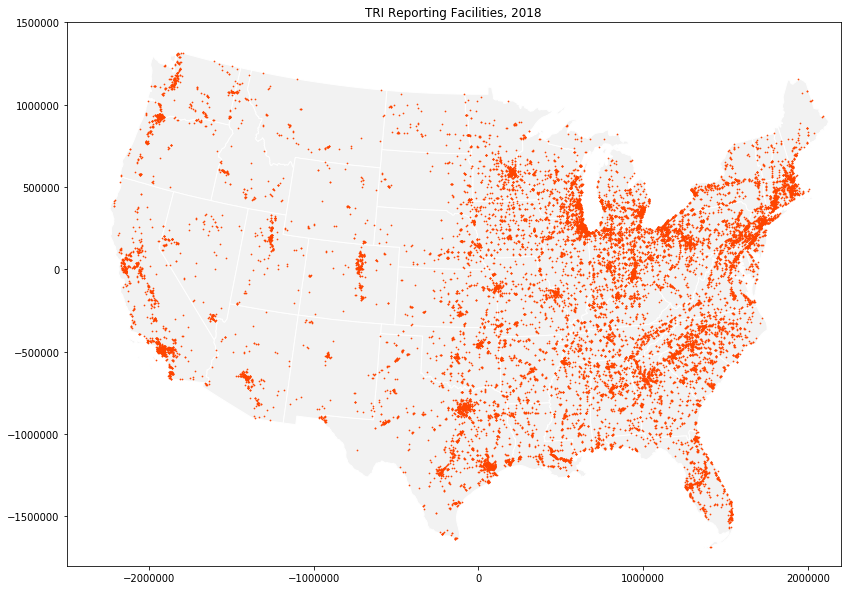

In [159]:
#plot facilties over state basemap to visualize distribution
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')

#project each layer to Albers Equal Conic for visualization
states_equal = states.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
gdf_equal = gdf.to_crs('+proj=aea +lat_1=20 +lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

#plot projected data
fig, ax = plt.subplots(figsize=(20,10))

states_equal.plot(ax=ax, edgecolor='white', color='#f2f2f2', zorder=0)
gdf_equal.plot(ax=ax, color='orangered', zorder=1, markersize=.5);



ax.set(xlim=(-2500000,2200000), ylim=(-1800000,1500000), title='TRI Reporting Facilities, 2018');

print